In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
#for coordinate in coordinates:
 #   print(coordinate[0], coordinate[1])

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fb468a3f5fa906b026cfdd3bb7524a74


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | baymak
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | hofn
Processing Record 7 of Set 1 | urmary
Processing Record 8 of Set 1 | diamantina
Processing Record 9 of Set 1 | luderitz
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | charters towers
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | chaozhou
Processing Record 15 of Set 1 | bengkulu
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | paka
Processing Record 18 of Set 1 | rocha
Processing Record 19 of Set 1 | marcona
City not found. Skipping...
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | ndiekro
City not found. Skipping...
Processing Record 38 of Set 4 | ndele
Processing Record 39 of Set 4 | yellowknife
Processing Record 40 of Set 4 | nemuro
Processing Record 41 of Set 4 | urusha
Processing Record 42 of Set 4 | poum
Processing Record 43 of Set 4 | shelburne
Processing Record 44 of Set 4 | kosh-agach
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | nantucket
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | tucuru
Processing Record 49 of Set 4 | mananara
Processing Record 50 of Set 4 | pakxan
Processing Record 1 of Set 5 | san rafael del sur
Processing Record 2 of Set 5 | pevek
Processing Record 3 of Set 5 | chuzhou
Processing Record 4 of Set 5 | itarema
Processing Record 5 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 5 | diu
Processing Record 7 of Set 5 | amherst
Processing Record 8 of Set 5 | astana
Processing Record 9 of Set 5 | beringovskiy
Processin

Processing Record 28 of Set 8 | strezhevoy
Processing Record 29 of Set 8 | marienburg
Processing Record 30 of Set 8 | dukat
Processing Record 31 of Set 8 | taltal
Processing Record 32 of Set 8 | calvia
Processing Record 33 of Set 8 | nabire
Processing Record 34 of Set 8 | maningrida
Processing Record 35 of Set 8 | qiqihar
Processing Record 36 of Set 8 | baghmara
Processing Record 37 of Set 8 | deputatskiy
Processing Record 38 of Set 8 | itoman
Processing Record 39 of Set 8 | yar-sale
Processing Record 40 of Set 8 | vao
Processing Record 41 of Set 8 | ondjiva
Processing Record 42 of Set 8 | haines junction
Processing Record 43 of Set 8 | general pico
Processing Record 44 of Set 8 | aleksandrov gay
Processing Record 45 of Set 8 | katobu
Processing Record 46 of Set 8 | cootamundra
Processing Record 47 of Set 8 | hobyo
Processing Record 48 of Set 8 | lata
Processing Record 49 of Set 8 | beyneu
Processing Record 50 of Set 8 | mnogovershinnyy
Processing Record 1 of Set 9 | mount isa
Processi

Processing Record 12 of Set 12 | gobabis
Processing Record 13 of Set 12 | port-de-paix
City not found. Skipping...
Processing Record 14 of Set 12 | umm durman
City not found. Skipping...
Processing Record 15 of Set 12 | hambantota
Processing Record 16 of Set 12 | malwan
City not found. Skipping...
Processing Record 17 of Set 12 | pangai
Processing Record 18 of Set 12 | iskateley
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | sivaki
Processing Record 21 of Set 12 | hwange
Processing Record 22 of Set 12 | homestead
Processing Record 23 of Set 12 | nyagan
Processing Record 24 of Set 12 | sibu
Processing Record 25 of Set 12 | road town
Processing Record 26 of Set 12 | skelleftea
Processing Record 27 of Set 12 | fortuna
Processing Record 28 of Set 12 | khovu-aksy
Processing Record 29 of Set 12 | beloha
Processing Record 30 of Set 12 | gat
Processing Record 31 of Set 12 | sur
Processing Record 32 of Set 12 | clearwater
Processing Record 33 of Set 12 | mamallapuram

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,57.99,74,34,5.99,NZ,2020-08-24 01:09:13
1,Baymak,52.59,58.32,46.87,89,0,5.32,RU,2020-08-24 01:09:14
2,Albany,42.60,-73.97,71.01,100,75,5.82,US,2020-08-24 01:09:14
3,Port Elizabeth,-33.92,25.57,55.40,87,88,8.05,ZA,2020-08-24 01:09:14
4,Bredasdorp,-34.53,20.04,55.40,93,100,2.24,ZA,2020-08-24 01:09:14
5,Hofn,64.25,-15.21,49.44,81,100,5.55,IS,2020-08-24 01:09:15
6,Urmary,55.68,47.94,55.40,87,87,4.47,RU,2020-08-24 01:09:15
7,Diamantina,-18.25,-43.60,52.57,92,96,6.06,BR,2020-08-24 01:09:15
8,Luderitz,-26.65,15.16,56.28,73,0,10.16,NA,2020-08-24 01:09:15
9,Charters Towers,-20.10,146.27,70.25,23,11,7.56,AU,2020-08-24 01:09:16


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2020-08-24 01:09:13,-46.19,168.86,57.99,74,34,5.99
1,Baymak,RU,2020-08-24 01:09:14,52.59,58.32,46.87,89,0,5.32
2,Albany,US,2020-08-24 01:09:14,42.60,-73.97,71.01,100,75,5.82
3,Port Elizabeth,ZA,2020-08-24 01:09:14,-33.92,25.57,55.40,87,88,8.05
4,Bredasdorp,ZA,2020-08-24 01:09:14,-34.53,20.04,55.40,93,100,2.24
5,Hofn,IS,2020-08-24 01:09:15,64.25,-15.21,49.44,81,100,5.55
6,Urmary,RU,2020-08-24 01:09:15,55.68,47.94,55.40,87,87,4.47
7,Diamantina,BR,2020-08-24 01:09:15,-18.25,-43.60,52.57,92,96,6.06
8,Luderitz,NA,2020-08-24 01:09:15,-26.65,15.16,56.28,73,0,10.16
9,Charters Towers,AU,2020-08-24 01:09:16,-20.10,146.27,70.25,23,11,7.56


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/23/20'

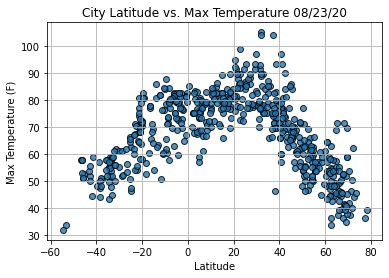

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

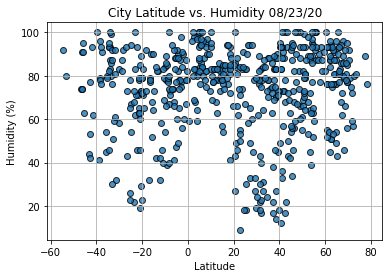

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

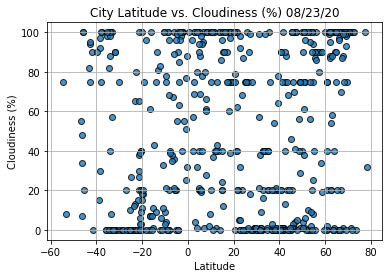

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

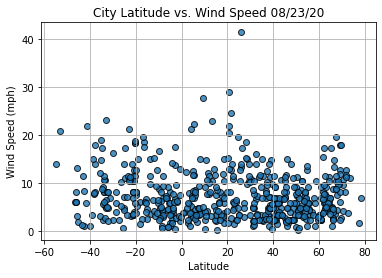

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
from scipy.stats import linregress

In [42]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                     Bengkulu
Country                        ID
Date          2020-08-24 01:05:51
Lat                          -3.8
Lng                        102.27
Max Temp                    79.07
Humidity                       78
Cloudiness                     85
Wind Speed                   3.71
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
555    False
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Baymak,RU,2020-08-24 01:09:14,52.59,58.32,46.87,89,0,5.32
2,Albany,US,2020-08-24 01:09:14,42.60,-73.97,71.01,100,75,5.82
5,Hofn,IS,2020-08-24 01:09:15,64.25,-15.21,49.44,81,100,5.55
6,Urmary,RU,2020-08-24 01:09:15,55.68,47.94,55.40,87,87,4.47
10,Tuktoyaktuk,CA,2020-08-24 01:09:16,69.45,-133.04,69.80,56,75,12.75
...,...,...,...,...,...,...,...,...,...
554,Chilliwack,CA,2020-08-24 01:09:32,49.17,-121.94,72.00,60,75,9.17
556,Iranshahr,IR,2020-08-24 01:11:41,27.20,60.68,89.60,49,99,4.70
557,Boa Vista,BR,2020-08-24 01:11:42,2.82,-60.67,75.20,83,75,5.82
558,Bouna,CI,2020-08-24 01:11:42,9.27,-3.00,72.21,90,2,5.06


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

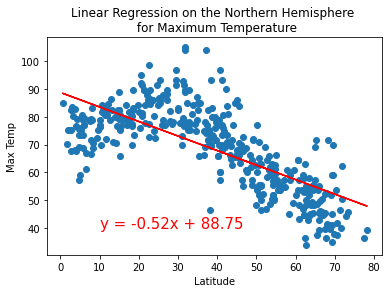

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

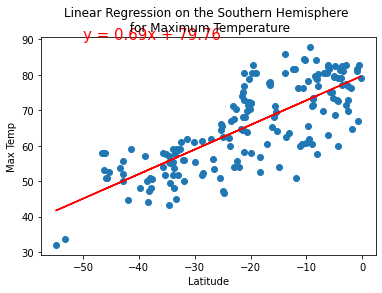

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

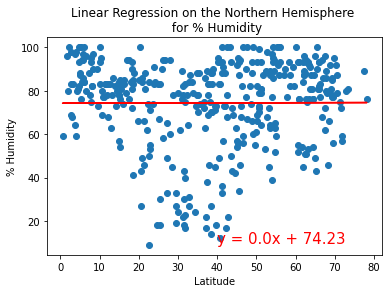

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

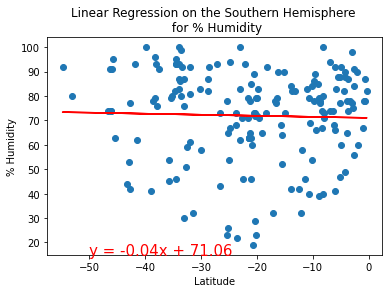

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

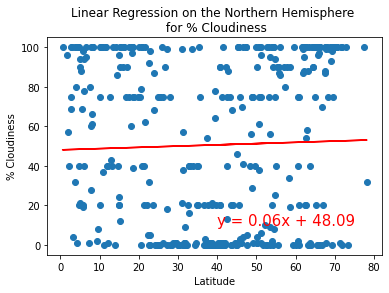

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

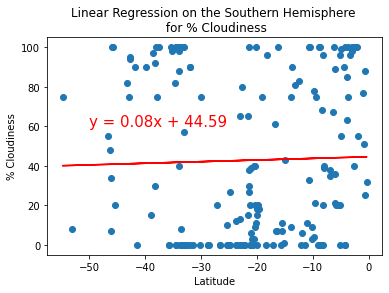

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

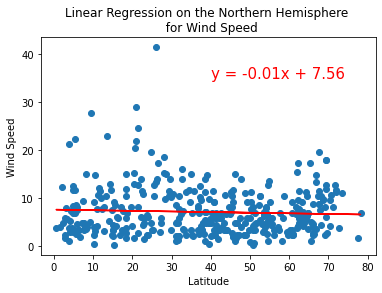

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n  for Wind Speed', 'Wind Speed',(40,35))

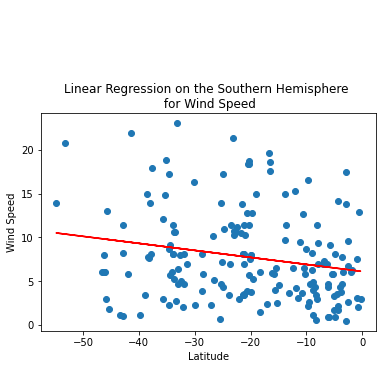

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))